# Name: Thiago de Oliveira da Costa StId: 2020005

### GitHub: https://github.com/ThBrasilDaCosta/CA2-ML-Neural-Semantic

### Project: ML - Neural Networks & Semantic Analysis

##### Importing necessary start libraries:

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading CSV file:

In [2]:
bank_records = pd.read_csv('BankRecords.csv')

#### Data Understanding:

In [3]:
bank_records.shape

(5000, 14)

In [4]:
bank_records.dtypes

ID                         int64
Age                        int64
Experience(Years)          int64
Income(Thousands's)        int64
Sort Code                  int64
Family                     int64
Credit Score             float64
Education                 object
Mortgage(Thousands's)      int64
Personal Loan             object
Securities Account        object
CD Account                object
Online Banking            object
CreditCard                object
dtype: object

In [5]:
bank_records.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [6]:
bank_records.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [7]:
bank_records.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

In [8]:
bank_records.loc[bank_records.duplicated()]

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard


In [9]:
bank_records.columns

Index(['ID', 'Age', 'Experience(Years)', 'Income(Thousands's)', 'Sort Code',
       'Family', 'Credit Score', 'Education', 'Mortgage(Thousands's)',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking',
       'CreditCard'],
      dtype='object')

#### Data Transformation / Feature Engineering:

In [10]:
bank_records = bank_records.rename(columns={"Income(Thousands's)": "Income(Thousands)", "Mortgage(Thousands's)":"Mortgage(Thousands)"})

In [11]:
bank_records.columns

Index(['ID', 'Age', 'Experience(Years)', 'Income(Thousands)', 'Sort Code',
       'Family', 'Credit Score', 'Education', 'Mortgage(Thousands)',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking',
       'CreditCard'],
      dtype='object')

In [12]:
bank_records = bank_records.drop(['ID', 'Sort Code',
       'Family', 'Credit Score','Mortgage(Thousands)',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking',
       'CreditCard'], axis = 1).copy()

In [13]:
bank_records

,Age,Experience(Years),Income(Thousands),Education
0,25,1,49,Diploma
1,45,19,34,Diploma
2,39,15,11,Diploma
3,35,9,100,Degree
4,35,8,45,Degree
...,...,...,...,...
4995,29,3,40,Masters
4996,30,4,15,Diploma
4997,63,39,24,Masters
4998,65,40,49,Degree


In [14]:
bank_records['Education'].unique()

array(['Diploma', 'Degree', 'Masters'], dtype=object)

In [15]:
oe = ['Diploma', 'Degree', 'Masters']

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
oenc = OrdinalEncoder(categories = [oe])

In [18]:
bank_records['Education'] = oenc.fit_transform(bank_records[['Education']])

In [19]:
bank_records

,Age,Experience(Years),Income(Thousands),Education
0,25,1,49,0.0
1,45,19,34,0.0
2,39,15,11,0.0
3,35,9,100,1.0
4,35,8,45,1.0
...,...,...,...,...
4995,29,3,40,2.0
4996,30,4,15,0.0
4997,63,39,24,2.0
4998,65,40,49,1.0


In [20]:
bank_records['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [21]:
bank_records['Experience(Years)'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [22]:
bank_records['Experience(Years)'] = bank_records['Experience(Years)'].abs()

In [23]:
bank_records['Experience(Years)'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [24]:
bank_records['Income(Thousands)'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [25]:
bank_records['Education'].unique()

array([0., 1., 2.])

#### Splitting Dataset / Modelling:

##### Splitting:

In [26]:
indpt_feat = bank_records.drop('Income(Thousands)', axis = 'columns')
dpt_feat = bank_records['Income(Thousands)']

X = indpt_feat
y = dpt_feat

In [27]:
X

,Age,Experience(Years),Education
0,25,1,0.0
1,45,19,0.0
2,39,15,0.0
3,35,9,1.0
4,35,8,1.0
...,...,...,...
4995,29,3,2.0
4996,30,4,0.0
4997,63,39,2.0
4998,65,40,1.0


In [28]:
y

0        49
1        34
2        11
3       100
4        45
       ... 
4995     40
4996     15
4997     24
4998     49
4999     83
Name: Income(Thousands), Length: 5000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17, test_size=0.2)

In [31]:
X_train.shape

(4000, 3)

In [32]:
X_test.shape

(1000, 3)

In [33]:
y_train.shape

(4000,)

In [34]:
y_test.shape

(1000,)

##### Modelling:

In [35]:
X_train

,Age,Experience(Years),Education
1926,30,6,1.0
805,55,29,1.0
1674,37,11,1.0
81,47,22,1.0
2266,38,13,0.0
...,...,...,...
2800,52,26,1.0
1337,26,0,1.0
406,45,19,0.0
2191,42,18,0.0


#### Neaural Model:

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
def neaural_model(neurons = 64, activation ='relu', optimizer = 'adam'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation= activation))
    model.add(Dense(32, activation= 'relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model
model= neaural_model()
early_stopping = EarlyStopping(patience=5)

model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2, callbacks = [early_stopping])

loss, mae = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100
100/100 - 1s - 15ms/step - loss: 3728.4556 - mae: 46.7388 - val_loss: 2479.8350 - val_mae: 38.9885
Epoch 2/100
100/100 - 0s - 2ms/step - loss: 2580.3486 - mae: 40.0018 - val_loss: 2261.9543 - val_mae: 37.0436
Epoch 3/100
100/100 - 0s - 2ms/step - loss: 2380.8518 - mae: 38.7955 - val_loss: 2092.4133 - val_mae: 35.9338
Epoch 4/100
100/100 - 0s - 2ms/step - loss: 2247.4587 - mae: 37.9780 - val_loss: 2019.7250 - val_mae: 35.7146
Epoch 5/100
100/100 - 0s - 2ms/step - loss: 2185.7473 - mae: 37.4439 - val_loss: 2020.8864 - val_mae: 36.4508
Epoch 6/100
100/100 - 0s - 2ms/step - loss: 2162.8413 - mae: 37.4909 - val_loss: 2006.3481 - val_mae: 36.2871
Epoch 7/100
100/100 - 0s - 2ms/step - loss: 2144.3972 - mae: 37.2754 - val_loss: 1987.6929 - val_mae: 35.2850
Epoch 8/100
100/100 - 0s - 1ms/step - loss: 2134.4846 - mae: 37.2809 - val_loss: 2032.8219 - val_mae: 36.9942
Epoch 9/100
100/100 - 0s - 2ms/step - loss: 2121.3921 - mae: 37.1433 - val_loss: 1981.2013 - val_mae: 35.9110
Epoch 10/

In [38]:
print(f"Mean Squared Error: {loss}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2076.8837890625
Mean Absolute Error: 35.627960205078125


In [39]:
from sklearn.metrics import r2_score

In [40]:
#r2 = r2_score(y_test, y_pred)

In [41]:
#r2

In [42]:

input_feat = np.array([[30, 5, 2.0]])
predicted_income = model.predict(input_feat.reshape(1,3), batch_size=1)
print(predicted_income)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[61.90482]]


In [43]:
y_pred = model.predict(X_test)*1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [44]:
y_pred

array([[53425.715],
       [65852.95 ],
       [59015.62 ],
       [56113.688],
       [85765.5  ],
       [87576.4  ],
       [78337.25 ],
       [65852.95 ],
       [58551.84 ],
       [55386.492],
       [70232.31 ],
       [69100.88 ],
       [65533.004],
       [56113.688],
       [61126.836],
       [55464.03 ],
       [72056.875],
       [62687.863],
       [71650.09 ],
       [76889.17 ],
       [61903.883],
       [67301.016],
       [68749.086],
       [64505.668],
       [62042.824],
       [69100.88 ],
       [71112.14 ],
       [57763.254],
       [62810.26 ],
       [78337.25 ],
       [74933.71 ],
       [71650.09 ],
       [60833.59 ],
       [72998.72 ],
       [64455.277],
       [64805.816],
       [64937.957],
       [63351.438],
       [69180.05 ],
       [52061.152],
       [85632.086],
       [69691.625],
       [58901.67 ],
       [70598.56 ],
       [78698.6  ],
       [72762.72 ],
       [76167.8  ],
       [59050.45 ],
       [70144.36 ],
       [81100.24 ],


##### Model Tunning

In [45]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

In [46]:
tunned_model = KerasRegressor(model=neaural_model, verbose=0)

In [47]:
param_grid = {
    'model__neurons': [16, 32, 64],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

In [48]:
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
grid = GridSearchCV(estimator=tunned_model, param_grid = param_grid, cv=3, verbose=2, n_jobs=1, scoring=scoring)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=16, model__optimizer=adam; total time=  10.3s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=16, model__optimizer=adam; total time=  10.3s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=16, model__optimizer=adam; total time=  10.2s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=16, model__optimizer=rmsprop; total time=   9.3s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=16, model__optimizer=rmsprop; total time=   9.0s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=16, model__optimizer=rmsprop; total time=   9.9s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=32, model__optimizer=adam; total time=   9.7s
[CV] END batch_size=16, epochs=50, model__activation=relu, model__neurons=32, model__opti

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -35.943835 using {'batch_size': 16, 'epochs': 100, 'model__activation': 'tanh', 'model__neurons': 64, 'model__optimizer': 'adam'}


In [50]:
best_model = grid_result.best_estimator_
mae = best_model.score(X_test, y_test)
print(f'Test MAE: {mae}')

Test MAE: 0.0482487678527832


In [51]:
print(f"Mean Squared Error: {loss}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2076.8837890625
Mean Absolute Error: 0.0482487678527832


In [52]:
bestpred = predictions = best_model.predict(X_test)

In [53]:
bestpred

array([62.7869  , 62.235836, 61.453842, 61.45912 , 86.85464 , 87.048164,
       80.92991 , 62.235836, 62.41078 , 61.480106, 75.59763 , 65.889206,
       61.893433, 61.45912 , 62.430115, 62.170563, 73.69111 , 61.808304,
       74.37016 , 77.26272 , 61.809776, 62.669975, 63.800125, 65.067085,
       65.376564, 65.889206, 63.354614, 64.59241 , 64.39724 , 80.92991 ,
       73.64215 , 74.37016 , 61.446255, 65.86495 , 62.658867, 61.85355 ,
       62.960712, 61.801987, 73.75867 , 61.583824, 87.466545, 65.81831 ,
       62.75195 , 73.35117 , 86.61477 , 73.472466, 65.91526 , 65.20253 ,
       65.8526  , 86.68653 , 65.5619  , 73.69111 , 65.8861  , 83.251   ,
       61.808655, 64.94016 , 86.65649 , 86.00299 , 63.354614, 73.902626,
       61.445805, 65.18932 , 64.57479 , 87.769936, 61.45889 , 62.41078 ,
       62.68323 , 61.76468 , 65.643074, 61.996815, 61.480106, 75.09008 ,
       87.252625, 61.808655, 65.17956 , 74.087   , 65.66843 , 74.41015 ,
       61.44574 , 62.41078 , 61.578384, 61.44619 , 

In [54]:
input_feat = np.array([[200, 100, 4.0]])
predicted_income = best_model.predict(input_feat.reshape(1,3), batch_size=1)*1000
print(predicted_income)

[61444.996]


In [55]:
import random

In [56]:
def random_data_generator(X):
    random_data = []
    for feature in X.columns:
        random_data.append(random.choice(X[feature]))
    return [random_data]

random_data = random_data_generator(X)

In [57]:
print(random_data)

[[55, 4, 0.0]]


In [58]:
print(best_model.predict(random_data)*1000)

[88649.664]


In [59]:
r2 = r2_score(y_test, y_pred)

In [60]:
r2

-2289843.25

#### Standard ML regressor (Linear Regression): 

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
linreg = LinearRegression()

In [63]:
linreg.fit(X_train, y_train)

LinearRegression()

In [64]:
linreg.score(X_test, y_test)

0.035892172268995215

In [65]:
linreg.score(X_train, y_train)

0.03873641360218383

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
y_pred = linreg.predict(X_test)

In [68]:
y_pred

array([64.90249193, 69.76347688, 59.02039398, 60.71501603, 83.20715143,
       84.03810271, 79.88334632, 69.76347688, 61.72098563, 61.13049167,
       81.81842569, 76.68426393, 68.54976946, 60.71501603, 73.15272099,
       63.00013205, 78.87737672, 70.21167202, 79.708328  , 79.26013286,
       70.65986715, 70.38669034, 71.00990379, 74.60688573, 63.38288819,
       76.68426393, 69.31528174, 64.24655897, 66.53167499, 79.88334632,
       77.18275466, 79.708328  , 57.98170488, 72.87954417, 71.87357457,
       68.9652451 , 72.08131239, 69.79619638, 80.57199878, 63.24058937,
       86.14820041, 74.15869059, 61.92872345, 79.32557186, 85.55770645,
       78.25416326, 74.33370891, 67.60308359, 74.36642841, 83.86308439,
       70.56170866, 78.87737672, 73.08728199, 83.27259043, 60.89003435,
       64.45429679, 85.97318209, 84.31127953, 69.31528174, 80.7797366 ,
       58.84537566, 77.51521521, 62.75967473, 84.66131617, 59.2281318 ,
       61.72098563, 68.8998061 , 60.68229653, 65.90846153, 62.79

In [69]:
mean_absolute_error(y_test, y_pred)

35.8341969646949

In [70]:
mean_squared_error(y_test, y_pred)

2025.1543836815754

In [71]:
r2_score(y_test, y_pred)

0.035892172268995215

##### Model Tunning:

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

In [73]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('feat_selec', RFE(LinearRegression())),
    ('lr', LinearRegression())
])

In [74]:
param_grid = {
    'poly__degree': [1, 2, 3],
    'feat_selec__n_features_to_select': [5, 6, 7, 8, 9, 10]
}

In [75]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

In [76]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('feat_selec',
                                        RFE(estimator=LinearRegression())),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'feat_selec__n_features_to_select': [5, 6, 7, 8, 9,
                                                              10],
                         'poly__degree': [1, 2, 3]},
             scoring='neg_mean_absolute_error', verbose=2)

In [77]:
best_linear_model = grid_search.best_estimator_

In [78]:
y_pred = best_linear_model.predict(X_test)

In [79]:
y_pred

array([ 67.58558547,  63.09117622,  65.6757277 ,  65.21343322,
        85.01000985,  85.59768133,  81.62401601,  63.09117622,
        66.61269885,  65.58998044,  83.24733384,  70.09550111,
        59.90100107,  65.21343322,  65.24581417,  66.96414456,
        78.98426168,  62.49598491,  80.64497219,  80.80472795,
        60.69660841,  63.5992263 ,  64.0490403 ,  67.46921769,
        66.64575983,  70.09550111,  62.48218235,  67.58907363,
        68.12976886,  81.62401601,  77.65317391,  80.64497219,
        65.02417384,  65.04906591,  64.67684558,  60.58857108,
        64.92033513,  61.886063  ,  80.31143093,  65.79687276,
        90.00513776,  66.99934354,  66.63947883,  77.14258375,
        90.65737689,  77.67078672,  65.46450583,  69.60899659,
        67.17165567,  87.39556286,  62.72344096,  78.98426168,
        65.12782649,  86.37813821,  66.44087217,  67.67058111,
        91.35130152,  88.42030681,  62.48218235,  80.81692477,
        63.19867233,  70.96483559,  66.68189202,  85.97

In [80]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

Test MAE: 35.49788624422594


In [81]:
mean_squared_error(y_test, y_pred)

1983.7742108039927

In [82]:
#from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(X_train)

StandardScaler()

In [85]:
X = pd.DataFrame([[100, 10, 5.0]], columns=['Age','Experience(Years)','Education'])
X_scaled = scaler.transform(X)
predicted_income = best_linear_model.predict(X_scaled)*1000
print(predicted_income)

[108846.47936993]


C:\Users\thiag\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Semantic/Sentiment Analysis

In [165]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thiag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Loading CSV file:

###### facebook_reviews.csv source: https://www.kaggle.com/datasets/ashishkumarak/play-store-reviews-facebook

In [166]:
facebook_reviews = pd.read_csv('facebook_reviews.csv')

In [167]:
facebook_reviews.head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,f25380ff-f8cf-4826-b06a-11cb4c667bf1,Great Govind,👍,2,0,NaN,2024-05-25 21:22:40,NaN
1,769796b5-74f3-45a5-b144-97e4bc72600a,irfan sahil,good,5,0,465.0.0.63.83,2024-05-25 21:21:43,465.0.0.63.83
2,53f99228-e22b-4578-801d-82751dd45a0f,philip trapp,it is what it is. a place to socialize with fr...,5,0,465.0.0.63.83,2024-05-25 21:20:11,465.0.0.63.83
3,62e1b9e9-1910-4df2-9381-f6dfc675ba08,Dustin Smith,awesome,5,0,465.0.0.63.83,2024-05-25 21:19:48,465.0.0.63.83
4,804e8071-9a6c-458f-9814-3571866af56a,esmail monavar,perfect 👌,5,0,NaN,2024-05-25 21:19:33,NaN
5,b3fb06e2-e0bb-49b9-8b75-60bfba4aff17,A V,😄💯,5,0,465.0.0.63.83,2024-05-25 21:19:26,465.0.0.63.83
6,4ef8f25a-48e4-4187-bd7b-ae2b6596c8c5,Koyai Koyai,chitko,3,0,465.0.0.63.83,2024-05-25 21:18:19,465.0.0.63.83
7,f92f2c94-1300-4f6c-bb8e-a13db7963132,Joaquina Melly Lim,Great,5,0,443.0.0.23.229,2024-05-25 21:16:11,443.0.0.23.229
8,165ddd70-d45c-4453-8fbe-c8f596a4419e,Pixie Mostoles,awesome 👌,5,0,465.0.0.63.83,2024-05-25 21:15:50,465.0.0.63.83
9,4c0b0322-3cab-4b69-bfe0-dcdbd72ce73c,Kennedy Lufeyo,super cool,3,0,465.0.0.63.83,2024-05-25 21:13:41,465.0.0.63.83


In [168]:
facebook_reviews.shape

(84913, 8)

In [169]:
facebook_reviews = facebook_reviews.drop(['reviewId', 'userName', 'thumbsUpCount', 'reviewCreatedVersion'], axis=1)
facebook_reviews.dropna(inplace=True)

In [170]:
facebook_reviews.shape

(74207, 4)

In [171]:
facebook_reviews = facebook_reviews.sample(n=10000, random_state=42).reset_index(drop=True)

In [172]:
facebook_reviews.shape

(10000, 4)

In [173]:
facebook_reviews.head()

,content,score,at,appVersion
0,Unscrupulous. ignorant. But you do have a grea...,1,2024-05-18 19:53:44,454.1.0.49.104
1,Meta makes little to no effort in protecting u...,3,2024-05-09 17:25:20,455.0.0.44.88
2,my instead app full privacy and security and a...,5,2024-04-25 22:18:51,460.0.0.34.89
3,For now its bad...the auto play in video is no...,2,2024-03-17 05:11:08,455.0.0.44.88
4,"C .NO 9 , M OR. ;,-, , ,,M.M ,, , v , nb .., y...",5,2024-05-25 10:21:04,463.1.0.53.85


In [174]:
facebook_reviews.dtypes

content       object
score          int64
at            object
appVersion    object
dtype: object

In [175]:
facebook_reviews['polarity_score'] = facebook_reviews['score'].apply(lambda x: 'Positive' if x>3 else ('Neutral' if x==3 else 'Negative'))

In [176]:
facebook_reviews

,content,score,at,appVersion,polarity_score
0,Unscrupulous. ignorant. But you do have a grea...,1,2024-05-18 19:53:44,454.1.0.49.104,Negative
1,Meta makes little to no effort in protecting u...,3,2024-05-09 17:25:20,455.0.0.44.88,Neutral
2,my instead app full privacy and security and a...,5,2024-04-25 22:18:51,460.0.0.34.89,Positive
3,For now its bad...the auto play in video is no...,2,2024-03-17 05:11:08,455.0.0.44.88,Negative
4,"C .NO 9 , M OR. ;,-, , ,,M.M ,, , v , nb .., y...",5,2024-05-25 10:21:04,463.1.0.53.85,Positive
...,...,...,...,...,...
9995,I love,5,2024-05-08 19:59:30,436.0.0.35.101,Positive
9996,Good,4,2024-05-15 07:50:40,463.1.0.53.85,Positive
9997,Very good,3,2024-05-12 06:46:51,456.0.0.39.90,Neutral
9998,Hello FB. Update version of FB doesn't respond...,3,2023-06-25 03:01:39,420.0.0.32.61,Neutral


<Axes: xlabel='score', ylabel='count'>

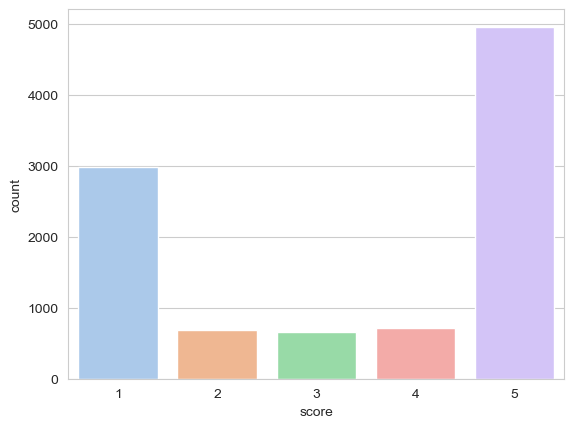

In [177]:
sns.set_style('whitegrid') 
sns.countplot (x= 'score', data=facebook_reviews, palette='pastel')

<Axes: xlabel='polarity_score', ylabel='count'>

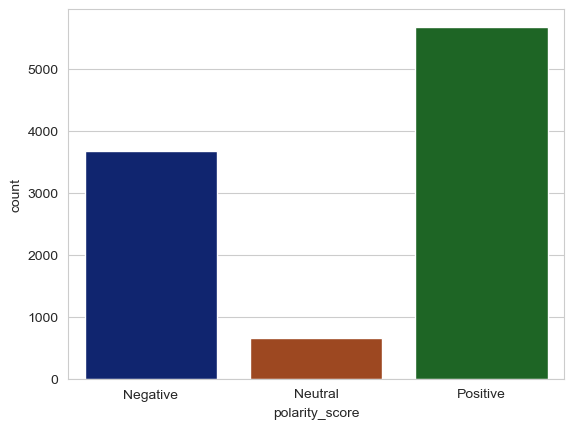

In [178]:
sns.set_style('whitegrid')
sns.countplot (x= 'polarity_score', data=facebook_reviews, palette='dark')

##### Data Pre-processing:

In [179]:
facebook_reviews_pos = facebook_reviews[facebook_reviews['polarity_score'] == 'Positive'] [0:5000]
facebook_reviews_neu = facebook_reviews[facebook_reviews['polarity_score'] == 'Neutral']
facebook_reviews_neg = facebook_reviews[facebook_reviews['polarity_score'] == 'Negative']

In [180]:
facebook_reviews_neu_over = facebook_reviews_neu.sample(5000, replace=True)
facebook_reviews_neg_over = facebook_reviews_neg.sample(5000, replace=True)
facebook_reviews = pd.concat([facebook_reviews_pos, facebook_reviews_neu_over, facebook_reviews_neg_over], axis = 0)

In [181]:
facebook_reviews.shape

(15000, 5)

In [182]:
def process_get_text(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in
string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if
word.lower() not in stpword])

In [183]:
facebook_reviews['content_text'] = facebook_reviews['content'].apply(process_get_text)

In [184]:
facebook_reviews.head()

,content,score,at,appVersion,polarity_score,content_text
2,my instead app full privacy and security and a...,5,2024-04-25 22:18:51,460.0.0.34.89,Positive,instead app full privacy security amazing feat...
4,"C .NO 9 , M OR. ;,-, , ,,M.M ,, , v , nb .., y...",5,2024-05-25 10:21:04,463.1.0.53.85,Positive,C 9 MM v nb XK z 6 V n
5,Facebook is a great app with which I see a lot...,5,2024-04-17 08:08:44,457.0.0.54.84,Positive,Facebook great app see lot news videos every d...
6,wow,5,2024-05-08 18:37:32,462.0.0.47.85,Positive,wow
8,Facebook is an amazing community that brings d...,5,2024-02-19 08:20:22,448.0.0.30.115,Positive,Facebook amazing community brings different pe...


In [185]:
facebook_reviews = facebook_reviews[['content_text', 'polarity_score']]

In [186]:
facebook_reviews.head()

,content_text,polarity_score
2,instead app full privacy security amazing feat...,Positive
4,C 9 MM v nb XK z 6 V n,Positive
5,Facebook great app see lot news videos every d...,Positive
6,wow,Positive
8,Facebook amazing community brings different pe...,Positive


In [187]:
facebook_reviews.shape

(15000, 2)

In [188]:
from sklearn.preprocessing import OneHotEncoder

In [189]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [190]:
oh = ohe.fit_transform(facebook_reviews[['polarity_score']])

In [191]:
facebook_reviews = pd.concat([facebook_reviews, oh], axis=1).drop(columns = ['polarity_score'])

In [192]:
facebook_reviews

,content_text,polarity_score_Negative,polarity_score_Neutral,polarity_score_Positive
2,instead app full privacy security amazing feat...,0.0,0.0,1.0
4,C 9 MM v nb XK z 6 V n,0.0,0.0,1.0
5,Facebook great app see lot news videos every d...,0.0,0.0,1.0
6,wow,0.0,0.0,1.0
8,Facebook amazing community brings different pe...,0.0,0.0,1.0
...,...,...,...,...
8174,May Facebook account cant openalways lost conn...,1.0,0.0,0.0
2162,1984 youre Winston Smith,1.0,0.0,0.0
5478,HATE HATE HATE new Ai search take away please,1.0,0.0,0.0
414,Honestly great app years ago cant even look co...,1.0,0.0,0.0


In [157]:
# oh = pd.get_dummies(facebook_reviews['polarity_score'])
# facebook_reviews.drop('polarity_score', axis=1, inplace=True)
# facebook_reviews = pd.concat([facebook_reviews, oh], axis=1)

In [194]:
remove_word = ['polarity_score_']

In [195]:
for word in remove_word:
    facebook_reviews.columns = facebook_reviews.columns.str.replace(word, '')

In [196]:
facebook_reviews.head()

,content_text,Negative,Neutral,Positive
2,instead app full privacy security amazing feat...,0.0,0.0,1.0
4,C 9 MM v nb XK z 6 V n,0.0,0.0,1.0
5,Facebook great app see lot news videos every d...,0.0,0.0,1.0
6,wow,0.0,0.0,1.0
8,Facebook amazing community brings different pe...,0.0,0.0,1.0
